In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

%matplotlib inline 
plt.style.use('ggplot')

pd.set_option('display.max_columns', 100) # displaying max 100 columns

df = pd.read_csv("real_estate_data.csv")

## Data Preprocessing

In [2]:
df.head(5)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [3]:
df.shape

(1883, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 26 columns):
tx_price              1883 non-null int64
beds                  1883 non-null int64
baths                 1883 non-null int64
sqft                  1883 non-null int64
year_built            1883 non-null int64
lot_size              1883 non-null int64
property_type         1883 non-null object
exterior_walls        1660 non-null object
roof                  1529 non-null object
basement              1657 non-null float64
restaurants           1883 non-null int64
groceries             1883 non-null int64
nightlife             1883 non-null int64
cafes                 1883 non-null int64
shopping              1883 non-null int64
arts_entertainment    1883 non-null int64
beauty_spas           1883 non-null int64
active_life           1883 non-null int64
median_age            1883 non-null float64
married               1883 non-null float64
college_grad          1883 non-null float64


In [5]:
df.isnull().sum() # there are some null values, let's deal with them later

tx_price                0
beds                    0
baths                   0
sqft                    0
year_built              0
lot_size                0
property_type           0
exterior_walls        223
roof                  354
basement              226
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
tx_year                 0
dtype: int64

In [6]:
df.columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement', 'restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'],
      dtype='object')

In [7]:
df.describe().round() #missing  exterior_walls and roof columns since they are not numbers

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.0,1883.0,1883.0,1883.0,1883.0,1883.0,1657.0,1883.0,1883.0,1883.0,1883.0,1883.0,1883.0,1883.0,1883.0,1883.0,1883.0,1883.0,1883.0,1883.0,1883.0,1883.0,1883.0
mean,422840.0,3.0,3.0,2329.0,1983.0,13393.0,1.0,40.0,5.0,5.0,5.0,41.0,3.0,23.0,16.0,39.0,69.0,65.0,467.0,140.0,7.0,3.0,2007.0
std,151463.0,1.0,1.0,1337.0,20.0,44949.0,0.0,47.0,4.0,8.0,8.0,54.0,5.0,26.0,18.0,7.0,20.0,17.0,232.0,73.0,2.0,1.0,5.0
min,200000.0,1.0,1.0,500.0,1880.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,11.0,5.0,88.0,30.0,1.0,1.0,1993.0
25%,300000.0,3.0,2.0,1345.0,1970.0,1542.0,1.0,7.0,1.0,0.0,0.0,6.0,0.0,4.0,4.0,33.0,58.0,54.0,320.0,94.0,5.0,3.0,2004.0
50%,392000.0,3.0,3.0,1907.0,1986.0,6098.0,1.0,23.0,3.0,2.0,3.0,22.0,2.0,15.0,10.0,38.0,73.0,66.0,426.0,125.0,7.0,3.0,2007.0
75%,525000.0,4.0,3.0,3005.0,2000.0,11761.0,1.0,58.0,7.0,6.0,6.0,51.0,5.0,35.0,21.0,43.0,84.0,78.0,569.0,169.0,8.0,3.0,2011.0
max,800000.0,5.0,6.0,8450.0,2015.0,1220551.0,1.0,266.0,24.0,54.0,47.0,340.0,35.0,177.0,94.0,69.0,100.0,100.0,4508.0,1374.0,10.0,4.0,2016.0


## Exploratory Data Analysis (EDA)

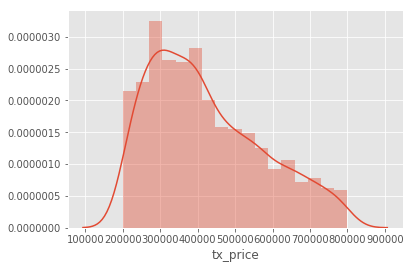

In [8]:
sns.distplot(df['tx_price'])
plt.show()

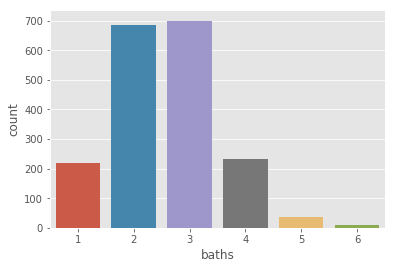

In [9]:
sns.countplot(x="baths", data=df)
plt.show()

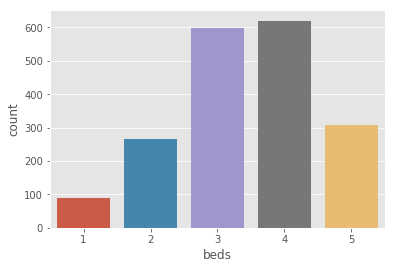

In [10]:
sns.countplot(x="beds", data=df)
plt.show()

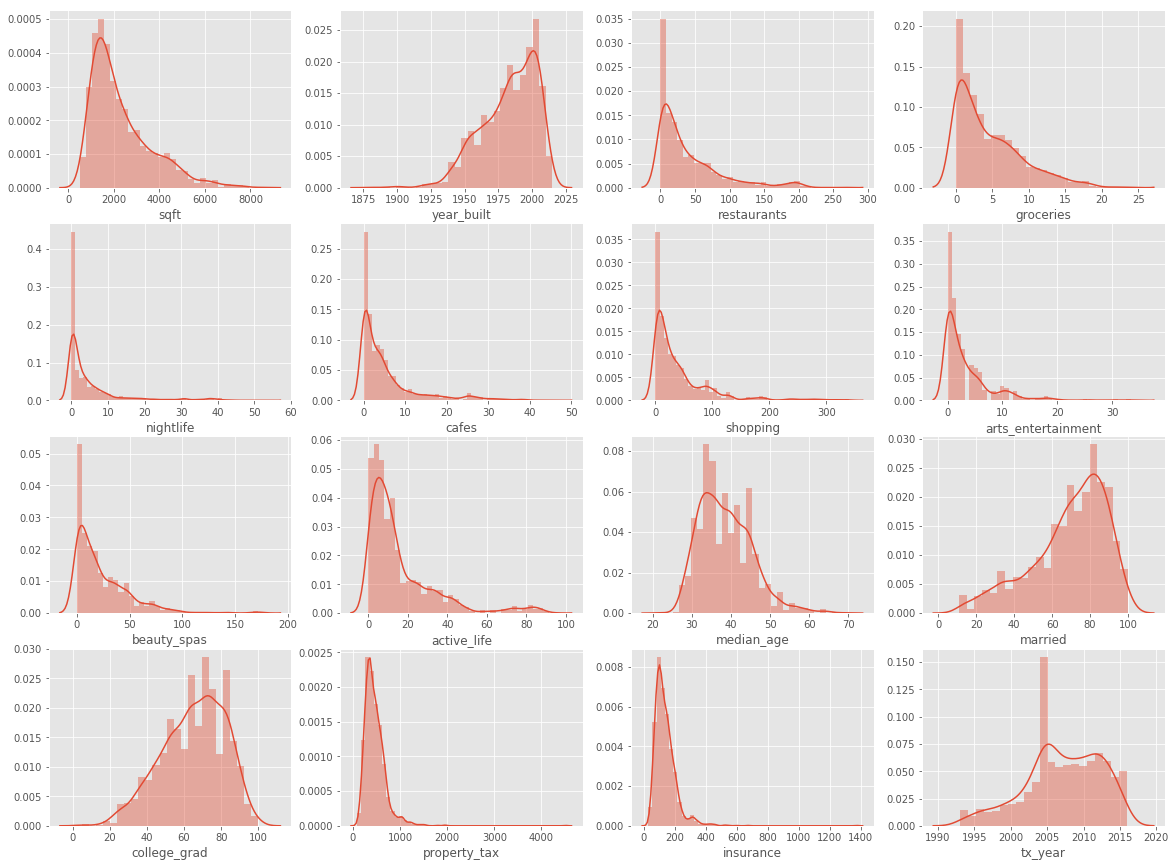

In [11]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))

col = ['sqft','year_built','restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance','tx_year']
x = 0

for i in range(ax.shape[0]):
    for j in range(0, ax.shape[1]):
        sns.distplot(df[col[x]],ax=ax[i][j])
        x += 1
plt.show()

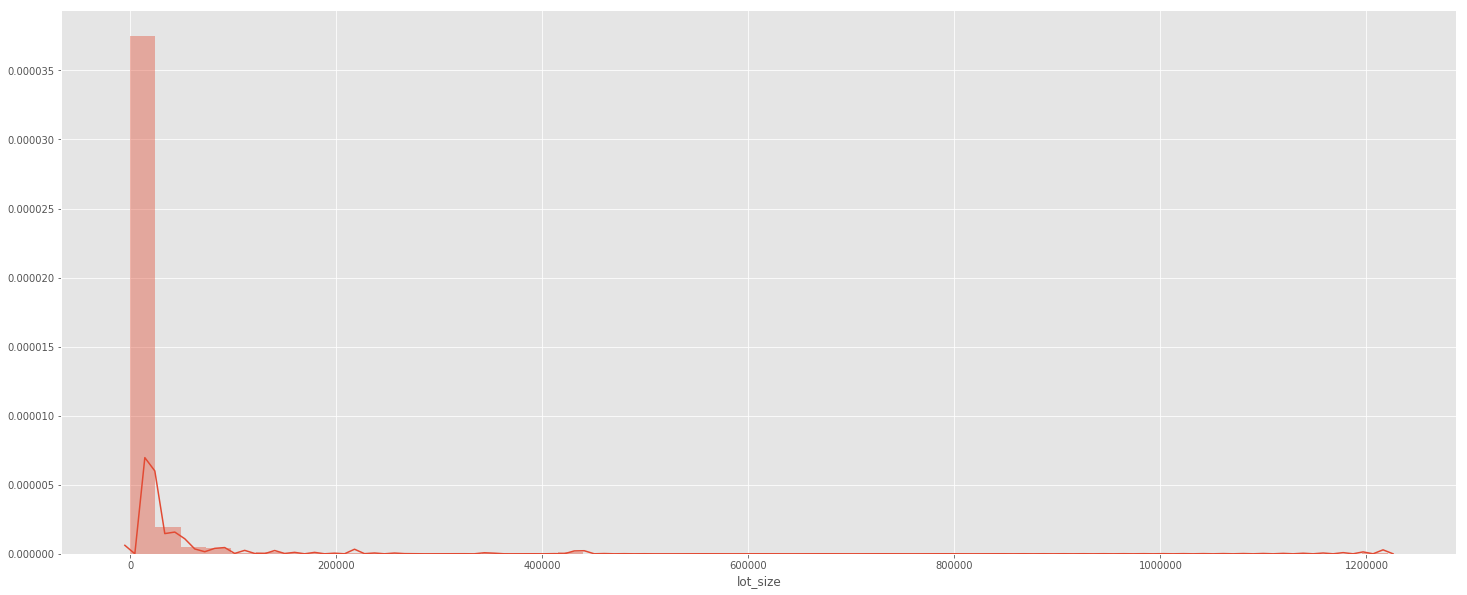

In [12]:
plt.subplots(figsize=(25, 10))
sns.distplot(df['lot_size'])
plt.show()

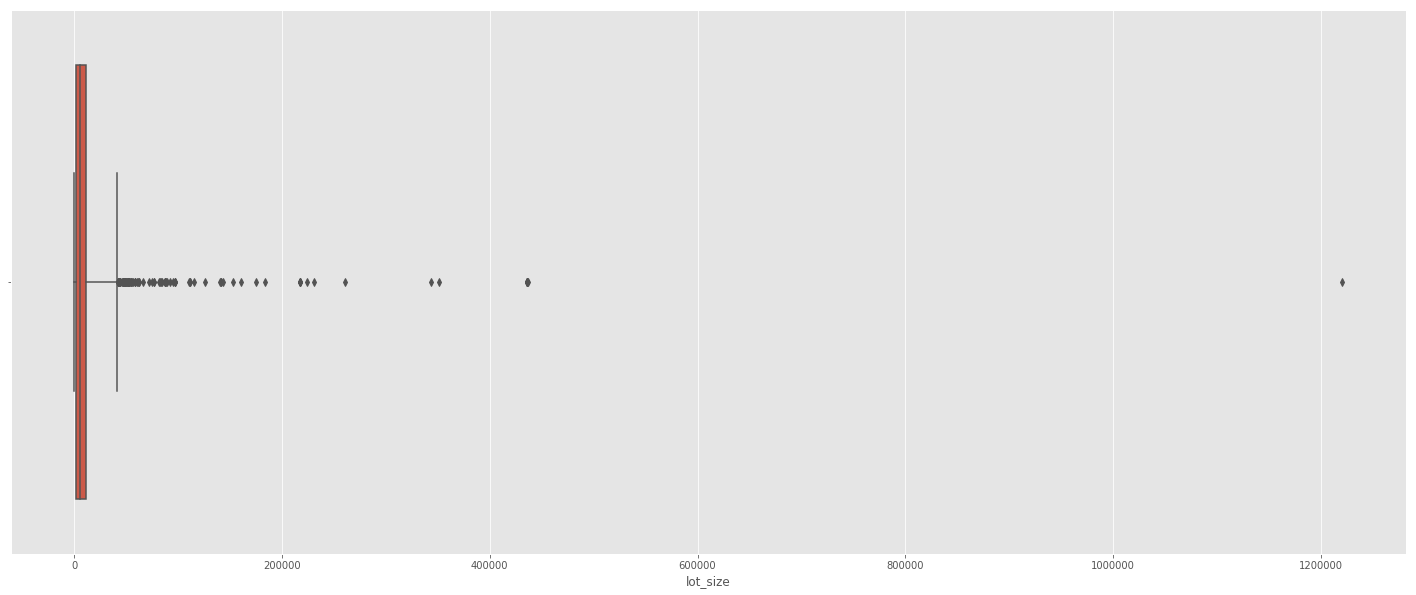

In [13]:
plt.subplots(figsize=(25, 10))
sns.boxplot(x=df['lot_size'], whis=[5, 95])
plt.show()

### Everything looks okay but there is an extreme outlier in Lot size

In [14]:
df[df['lot_size']>200000].sort_values('lot_size', ascending=False)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
102,292999,2,1,875,1950,1220551,Apartment / Condo / Townhouse,Brick,NaN,NaN,63,11,11,8,39,18,42,44,33.0,35.0,87.0,230.0,79.0,6.0,3.0,2014
1111,352000,4,2,2632,1969,436471,Single-Family,NaN,Composition Shingle,1.0,0,0,0,0,0,0,0,2,49.0,78.0,72.0,630.0,162.0,8.0,3.0,2002
1876,760000,5,5,7842,2003,436035,Single-Family,Combination,NaN,1.0,0,0,0,0,0,0,0,0,48.0,76.0,62.0,881.0,249.0,7.5,2.0,2008
1832,575000,5,4,5933,2003,436035,Single-Family,Siding (Alum/Vinyl),NaN,1.0,0,0,0,0,0,0,0,0,42.0,84.0,38.0,668.0,189.0,8.0,3.0,2010
1839,750000,5,4,6243,2006,435600,Single-Family,Brick,NaN,1.0,1,1,0,0,0,0,0,0,43.0,89.0,51.0,704.0,199.0,8.0,3.0,2012
1115,570000,4,2,2720,2013,435600,Single-Family,Siding (Alum/Vinyl),NaN,1.0,0,0,0,0,1,0,0,0,41.0,67.0,24.0,594.0,168.0,8.0,3.0,2013
1570,775000,4,5,6220,2006,435600,Single-Family,Combination,NaN,1.0,0,0,0,0,0,0,0,1,42.0,84.0,38.0,678.0,192.0,8.0,3.0,2007
1817,745000,5,4,5149,2001,435600,Single-Family,Wood Siding,NaN,1.0,0,0,0,0,1,1,0,0,46.0,92.0,35.0,678.0,192.0,8.0,3.0,2013
1852,700000,5,5,4189,2006,351529,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,0,0,0,0,1,0,0,0,41.0,67.0,24.0,660.0,187.0,8.0,3.0,2010
1479,372500,4,3,5070,1973,343252,Single-Family,Brick,Asphalt,1.0,0,0,0,0,1,0,0,0,43.0,87.0,66.0,807.0,246.0,8.0,1.0,1994


In [15]:
df = df.drop(102)
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1657.0,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000
mean,422908.798618,3.421360,2.580765,2330.171626,1982.981403,12751.197131,1.0,40.198193,4.501594,5.071732,5.323592,40.803401,3.386291,23.407014,15.820404,38.604145,69.109989,65.073858,466.903294,140.486716,6.503188,2.793305,2007.107864
std,151473.251553,1.068335,0.945125,1336.926475,20.287099,35304.268897,0.0,46.876522,4.489725,8.465815,7.541060,53.553509,4.688951,25.780204,17.660471,6.634615,19.649267,16.950137,231.653858,72.935379,1.996605,0.505470,5.195851
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1346.000000,1970.000000,1542.000000,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.500000,1986.000000,6074.000000,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,11761.000000,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,436471.000000,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


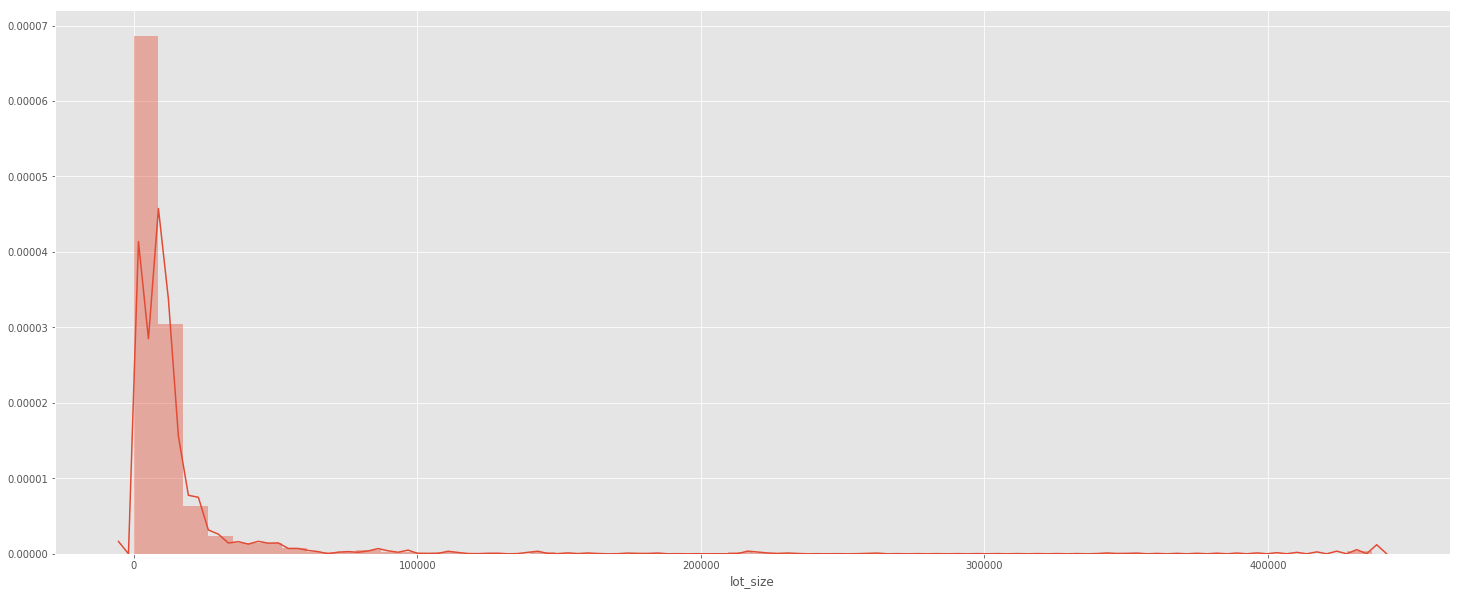

In [16]:
plt.subplots(figsize=(25, 10))
sns.distplot(df['lot_size'])
plt.show()

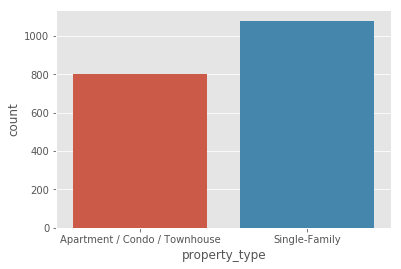

In [17]:
sns.countplot(x = 'property_type', data=df)
plt.show()

In [18]:
df['exterior_walls'].unique()

array(['Wood Siding', 'Brick', 'Concrete Block', 'Wood',
       'Siding (Alum/Vinyl)', 'Stucco', 'Concrete', 'Block', nan, 'Metal',
       'Wood Shingle', 'Masonry', 'Brick veneer', 'Other', 'Combination',
       'Asbestos shingle', 'Rock, Stone'], dtype=object)

In [19]:
df['roof'].unique()

array([nan, 'Composition Shingle', 'Other', 'Gravel/Rock',
       'Roll Composition', 'Asphalt', 'Slate', 'asphalt', 'Shake Shingle',
       'Built-up', 'Asbestos', 'Metal', 'shake-shingle',
       'Wood Shake/ Shingles', 'Composition', 'composition',
       'asphalt,shake-shingle'], dtype=object)

In [20]:
df['roof'][df['roof'] == 'composition'] = 'Composition'
df['roof'][df['roof'] == 'shake-shingle'] = 'Shake Shingle'
df['roof'][df['roof'] == 'asphalt'] = 'Asphalt'
df['roof'] = df['roof'].fillna('None')
df['exterior_walls'] = df['exterior_walls'].fillna('None')

C:\Users\edwin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\edwin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\edwin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Wow, there are lots of different wall types

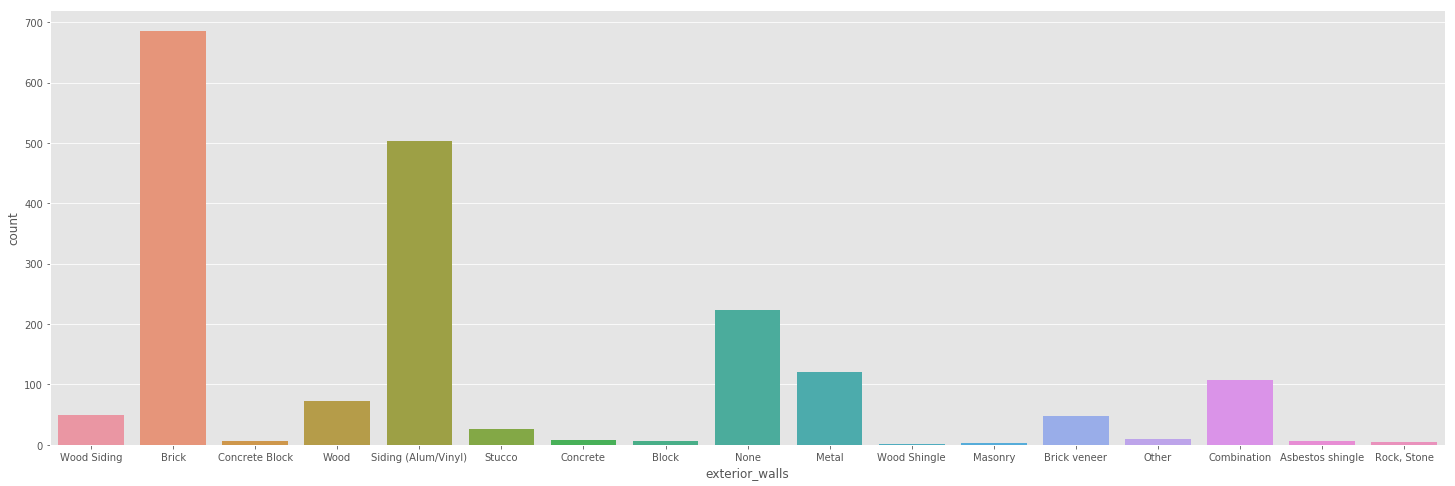

In [21]:
plt.subplots(figsize=(25, 8))
sns.countplot(x='exterior_walls', data=df)
plt.show()

In [22]:
df['exterior_walls'].value_counts()

Brick                  686
Siding (Alum/Vinyl)    503
None                   223
Metal                  120
Combination            107
Wood                    72
Wood Siding             49
Brick veneer            48
Stucco                  26
Other                   10
Concrete                 8
Concrete Block           7
Block                    7
Asbestos shingle         6
Rock, Stone              5
Masonry                  3
Wood Shingle             2
Name: exterior_walls, dtype: int64

In [23]:
df['exterior_walls'][(df['exterior_walls']!='Brick')& (df['exterior_walls']!='Siding (Alum/Vinyl)')& (df['exterior_walls']!='None')
                     &(df['exterior_walls']!='Metal')&(df['exterior_walls']!='Combination')] = 'Other'

C:\Users\edwin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Looks more neat

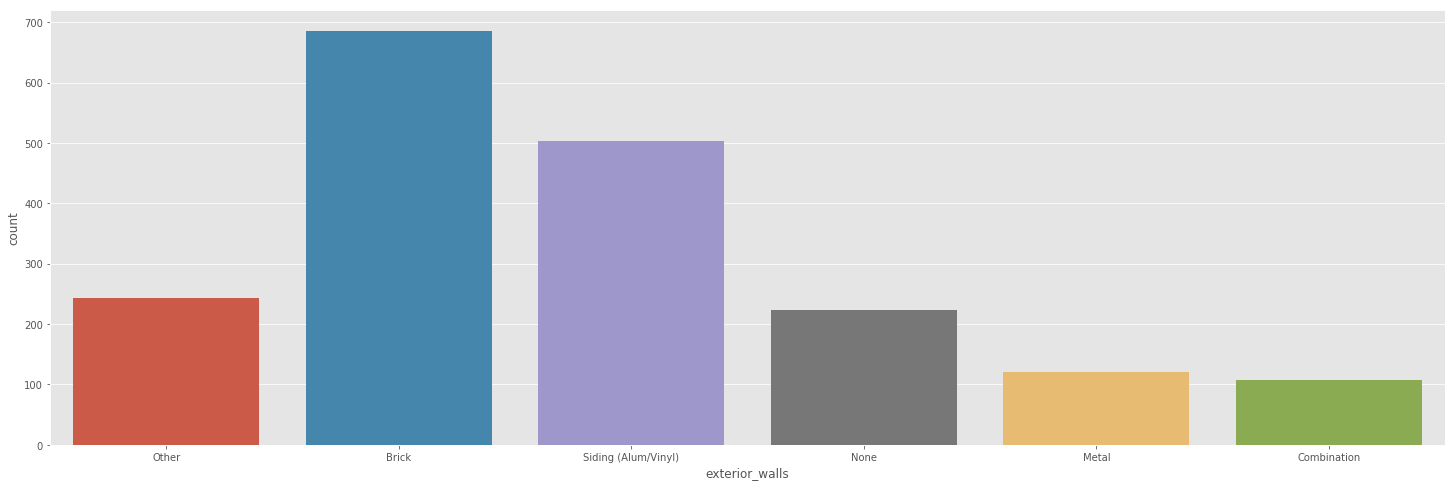

In [24]:
plt.subplots(figsize=(25, 8))
sns.countplot(x='exterior_walls', data=df)
plt.show()

### Lots of different roof types as well

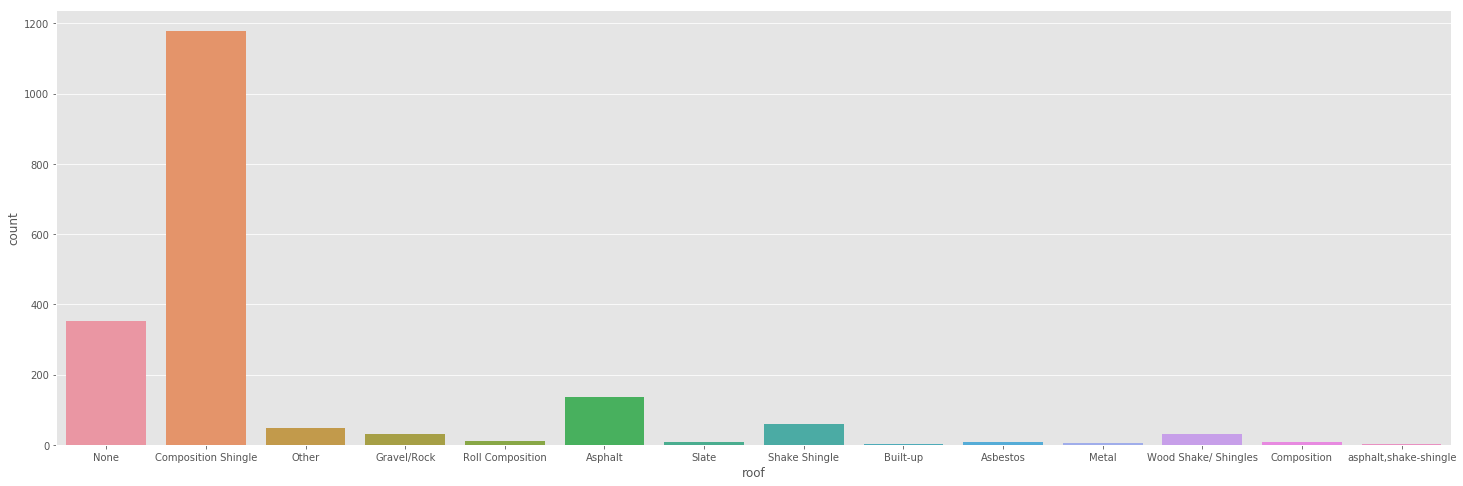

In [25]:
plt.subplots(figsize=(25, 8))
sns.countplot(x='roof', data=df)
plt.show()

In [26]:
df['roof'].value_counts()

Composition Shingle      1179
None                      353
Asphalt                   137
Shake Shingle              58
Other                      49
Wood Shake/ Shingles       30
Gravel/Rock                30
Roll Composition           12
Asbestos                    9
Slate                       9
Composition                 9
Metal                       4
Built-up                    2
asphalt,shake-shingle       1
Name: roof, dtype: int64

In [27]:
df['roof'][(df['roof']!='Composition Shingle')& (df['roof']!='None')& (df['roof']!='Asphalt')
                     &(df['roof']!='Shake Shingle')&(df['roof']!='Other')] = 'Other'

C:\Users\edwin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Grouping the roof types

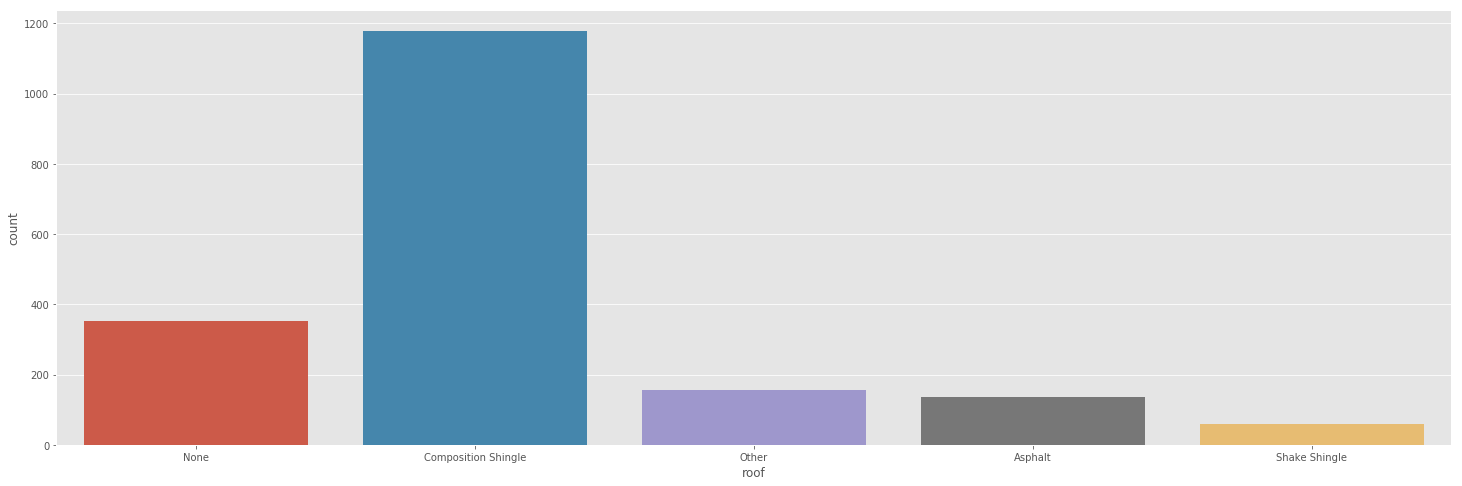

In [28]:
plt.subplots(figsize=(25, 8))
sns.countplot(x='roof', data=df)
plt.show()

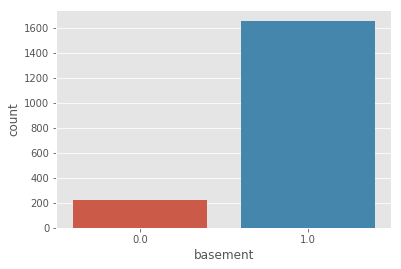

In [29]:
df['basement'] = df['basement'].fillna(0)
sns.countplot(df['basement'])
plt.show()

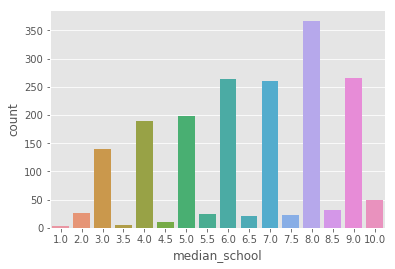

In [30]:
sns.countplot(df['median_school'])
plt.show()

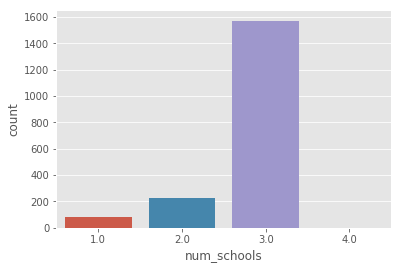

In [31]:
sns.countplot(df['num_schools'])
plt.show()

## Feature Engineering

### Combing number of bedrooms and bathrooms

In [32]:
df['beds_baths'] = df['beds'] + df['baths']

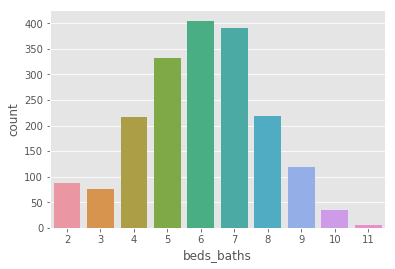

In [33]:
sns.countplot(df['beds_baths'])
plt.show()

### Creating house age at the purchase time feature

In [34]:
df['house_age_at_purchase'] = df['tx_year'] - df['year_built'] 

### Some properties were built way after the customers bought them

In [35]:
df[['year_built','tx_year','house_age_at_purchase']][df['house_age_at_purchase']<0]

,year_built,tx_year,house_age_at_purchase
406,2013,2005,-8
1140,2003,2002,-1
1459,2004,2003,-1
1540,2015,2014,-1
1556,2002,2000,-2
1572,2007,2005,-2
1718,2006,2005,-1
1782,2010,2003,-7
1798,2006,2005,-1
1809,2013,2012,-1


In [36]:
# Counting newly built properties at transaction year
df[['year_built','tx_year','house_age_at_purchase']][df['house_age_at_purchase']==0].count()

year_built               246
tx_year                  246
house_age_at_purchase    246
dtype: int64

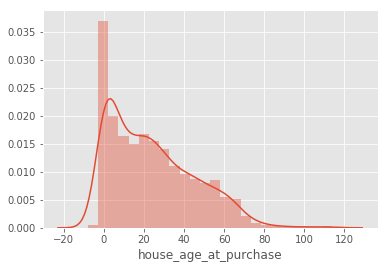

In [37]:
sns.distplot(df['house_age_at_purchase'])
plt.show()

In [38]:
#df_negative_age = df[df['house_age_at_purchase']<0] # command for dropping those negative house age at purchase
#df = df.drop(df_negative_age.index, axis=0)

#df['house_age_at_purchase'][df['house_age_at_purchase']<0] = 0

In [39]:
df['tx_year'] = 2016 - df['tx_year'] # scaling of the ticket year by the latest ticket year

### From a house buyer perspective, there are lots of factors taking into consideration when making a decision to buy a property. The neighbourhood and the surrounding surburb is a huge factor, it is safe to assume one would not consider just one single factor. Is there always something going on around? Is it a vivid surburb? Is the property in the CBD?

In [40]:
df['surburb'] = df['restaurants'] + df['groceries'] + df['nightlife'] + df['cafes'] + df['shopping'] + df['arts_entertainment'] + df['beauty_spas'] + df['active_life']

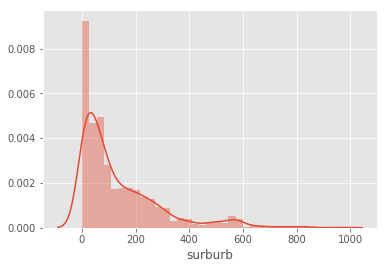

In [41]:
sns.distplot(df['surburb'])
plt.show()

In [42]:
#df['insurance_per_sqft'] = df['insurance'] / df['sqft']
#df['property_tax_per_sqft'] = df['property_tax'] / df['sqft']

### Creating a correlation matrix

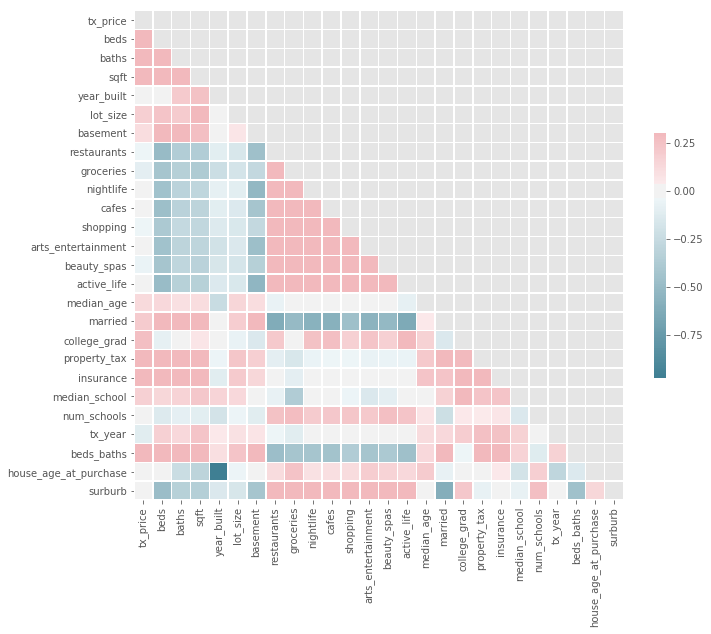

In [43]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### One hot encoding the categories and combine the dataframe together

In [44]:
labels = ['property_type','roof','exterior_walls']

transformed = pd.get_dummies(df[labels])

X = pd.concat([df, transformed], axis =1)

In [45]:
X.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,beds_baths,house_age_at_purchase,surburb,property_type_Apartment / Condo / Townhouse,property_type_Single-Family,roof_Asphalt,roof_Composition Shingle,roof_None,roof_Other,roof_Shake Shingle,exterior_walls_Brick,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_None,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl)
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Other,None,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,3,2,0,365,1,0,0,0,1,0,0,0,0,0,0,1,0
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,10,2,41,268,1,0,0,1,0,0,0,1,0,0,0,0,0
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Other,None,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,4,2,49,504,1,0,0,0,1,0,0,0,0,0,0,1,0
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Other,None,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,11,2,5,563,1,0,0,0,1,0,0,0,0,0,0,1,0
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,None,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,14,2,10,414,1,0,0,0,1,0,0,1,0,0,0,0,0


In [46]:
X = X.drop(['tx_price','year_built','property_type','exterior_walls', 'roof','restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life','beds','baths'], axis=1)

In [47]:
X.head()

,sqft,lot_size,basement,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,beds_baths,house_age_at_purchase,surburb,property_type_Apartment / Condo / Townhouse,property_type_Single-Family,roof_Asphalt,roof_Composition Shingle,roof_None,roof_Other,roof_Shake Shingle,exterior_walls_Brick,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_None,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl)
0,584,0,0.0,33.0,65.0,84.0,234.0,81.0,9.0,3.0,3,2,0,365,1,0,0,0,1,0,0,0,0,0,0,1,0
1,612,0,1.0,39.0,73.0,69.0,169.0,51.0,3.0,3.0,10,2,41,268,1,0,0,1,0,0,0,1,0,0,0,0,0
2,615,0,0.0,28.0,15.0,86.0,216.0,74.0,8.0,3.0,4,2,49,504,1,0,0,0,1,0,0,0,0,0,0,1,0
3,618,33541,0.0,36.0,25.0,91.0,265.0,92.0,9.0,3.0,11,2,5,563,1,0,0,0,1,0,0,0,0,0,0,1,0
4,634,0,0.0,37.0,20.0,75.0,88.0,30.0,9.0,3.0,14,2,10,414,1,0,0,0,1,0,0,1,0,0,0,0,0


In [48]:
X.isnull().sum()

sqft                                           0
lot_size                                       0
basement                                       0
median_age                                     0
married                                        0
college_grad                                   0
property_tax                                   0
insurance                                      0
median_school                                  0
num_schools                                    0
tx_year                                        0
beds_baths                                     0
house_age_at_purchase                          0
surburb                                        0
property_type_Apartment / Condo / Townhouse    0
property_type_Single-Family                    0
roof_Asphalt                                   0
roof_Composition Shingle                       0
roof_None                                      0
roof_Other                                     0
roof_Shake Shingle  

In [49]:
X.shape

(1882, 27)

In [50]:
y = df[['tx_price']]

In [51]:
type(y) # y = df['tx_price'] will give a dataframe series

pandas.core.frame.DataFrame

## Modeling and Evaluation

In [52]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0) 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1411, 27) (1411, 1)
(471, 27) (471, 1)


In [53]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

### XGboost

Mean absolute error: 45539.90


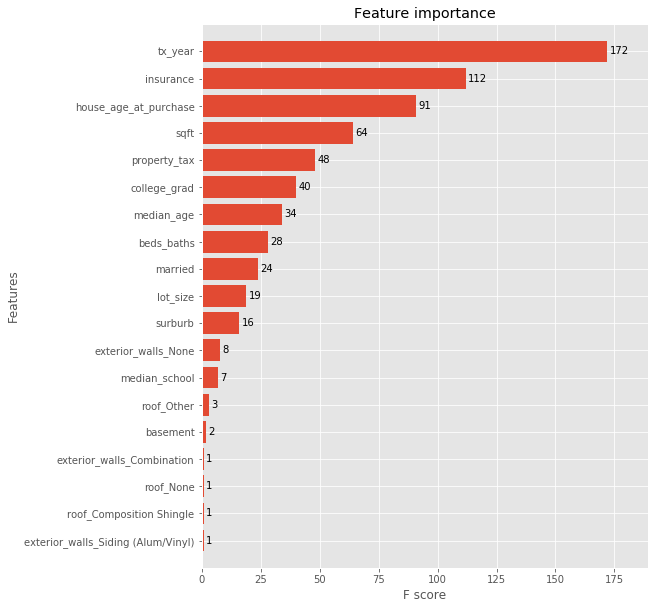

In [54]:
from xgboost import XGBRegressor, plot_importance

from sklearn.metrics import mean_absolute_error

xgb_model = XGBRegressor()

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)],
        eval_metric='mae',
        early_stopping_rounds=20, verbose=False)

y_pred = xgb_model.predict(X_test)

print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

fig, ax = plt.subplots(figsize=(8,10))
plot_importance(xgb_model, max_num_features=50, height=0.8, ax=ax)

plt.show()

### Linear Regression

In [55]:
import statsmodels.api as sm
#import statsmodels.formula.api as smf

mul_reg = sm.OLS(y_train, X_train).fit()
print(mul_reg.summary())

C:\Users\edwin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     50.40
Date:                Fri, 08 Jun 2018   Prob (F-statistic):          1.64e-169
Time:                        22:57:31   Log-Likelihood:                -18399.
No. Observations:                1411   AIC:                         3.685e+04
Df Residuals:                    1386   BIC:                         3.698e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [56]:
y_pred = mul_reg.predict(X_test)

print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

Mean absolute error: 87268.55


### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Mean squared error: %.2f"
      % mean_absolute_error(y_test, y_pred))

Mean squared error: 63706.58


In [58]:
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

1.0


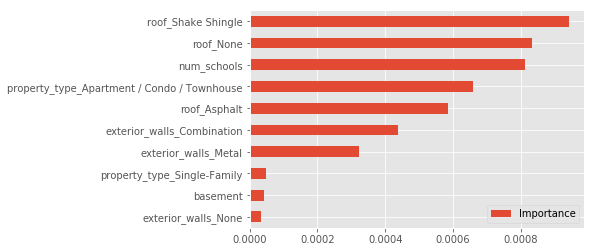

In [59]:
def plot_variable_importance( X , y ):
    tree = DecisionTreeRegressor( random_state = 0 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
plot_variable_importance(X_train, y_train)

### Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Mean squared error: %.2f"
      % mean_absolute_error(y_test, y_pred))

Mean squared error: 49731.82


0.9611741765502485


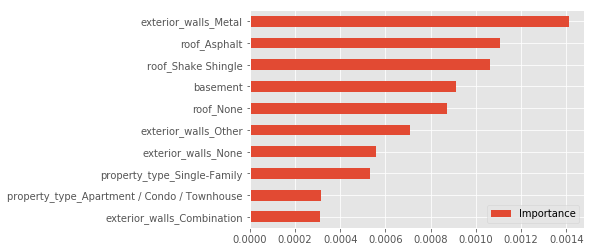

In [61]:
def RF_plot_variable_importance( X , y ):
    tree = RandomForestRegressor( random_state = 0 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
RF_plot_variable_importance(X_train, y_train)

In [62]:
list(transformed.columns)

['property_type_Apartment / Condo / Townhouse',
 'property_type_Single-Family',
 'roof_Asphalt',
 'roof_Composition Shingle',
 'roof_None',
 'roof_Other',
 'roof_Shake Shingle',
 'exterior_walls_Brick',
 'exterior_walls_Combination',
 'exterior_walls_Metal',
 'exterior_walls_None',
 'exterior_walls_Other',
 'exterior_walls_Siding (Alum/Vinyl)']

### XGBoost has the lowest MAE around 45k. Let's see if we can improve the model.
### It seems those one hot encoding features are not that meaningful, let's drop them

In [63]:
X_train = X_train.drop(list(transformed.columns),axis=1)
X_test = X_test.drop(list(transformed.columns),axis=1)

Mean absolute error: 45210.95


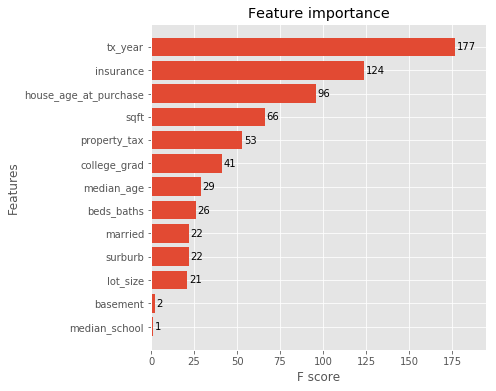

In [64]:
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)],
        eval_metric='mae',
        early_stopping_rounds=20, verbose=False)

y_pred = xgb_model.predict(X_test)

print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

fig, ax = plt.subplots(figsize=(6,6))
plot_importance(xgb_model, max_num_features=50, height=0.8, ax=ax)

plt.show()

## Demonstration of using pipeline

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor

# Construct some pipelines
pipe_regr = Pipeline([('regr', LinearRegression())])

pipe_dt = Pipeline([('dt', DecisionTreeRegressor(random_state=0))])

pipe_rf = Pipeline([('rf', RandomForestRegressor(random_state=0))])

pipe_xgb = Pipeline([('xgb',  XGBRegressor(random_state=0))])

pipe_cat = Pipeline([('cat', CatBoostRegressor(iterations=300, random_state=0, verbose=False))])

# List of pipelines for ease of iteration
pipelines = [pipe_regr, pipe_dt, pipe_rf, pipe_xgb, pipe_cat]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Linear Regression', 1: 'Decision Tree', 2: 'Random Forest', 3:'XGBoost', 4: 'CatBoost'}
    
# Fit the pipeline, predict value and compare accuracies
# Identify the most accurate model on test data

best_acc = 0.0
best_rgr = 0
best_pipe = ''

for idx, val in enumerate(pipelines):
    start_time = time.time()
    val.fit(X_train,y_train)
    y_pred = val.predict(X_test)
    mae = mean_absolute_error(y_pred, y_test)
    elapsed_time = time.time() - start_time
    print('%s pipeline mean absolute error: %.3f | Time taken: %f' % 
          (pipe_dict[idx], mae , elapsed_time))
    
    if idx == 0:
        best_acc = mae
        best_pipe = val
        best_rgr = idx
    elif mae < best_acc:
        best_acc = mae
        best_pipe = val
        best_rgr = idx
        
print('Regressor with lowest mean absolute error: %s' % pipe_dict[best_rgr])

# Save pipeline to file
joblib.dump(best_pipe, 'best_pipeline.pkl', compress=1)
print('Saved %s pipeline to file' % pipe_dict[best_rgr])

Linear Regression pipeline mean absolute error: 86699.147 | Time taken: 0.000971
Decision Tree pipeline mean absolute error: 63572.306 | Time taken: 0.010970
Random Forest pipeline mean absolute error: 49076.574 | Time taken: 0.075824
XGBoost pipeline mean absolute error: 45210.945 | Time taken: 0.085770
CatBoost pipeline mean absolute error: 46780.918 | Time taken: 6.481659
Regressor with lowest mean absolute error: XGBoost
Saved XGBoost pipeline to file


In [66]:
# drop more columns
X_train = X_train.drop(['basement','median_school','num_schools'],axis=1)
X_test = X_test.drop(['basement','median_school','num_schools'],axis=1)

Mean absolute error: 45422.68


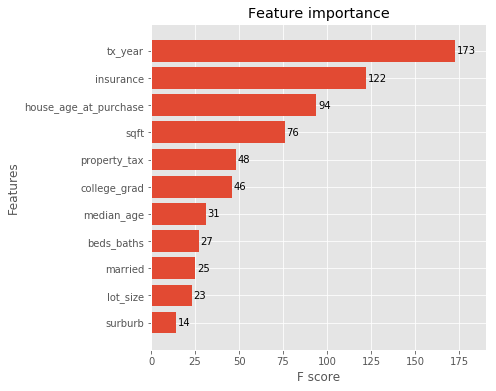

In [67]:
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)],
        eval_metric='mae',
        early_stopping_rounds=20, verbose=False)

y_pred = xgb_model.predict(X_test)

print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

fig, ax = plt.subplots(figsize=(6,6))
plot_importance(xgb_model, max_num_features=50, height=0.8, ax=ax)

plt.show()

### Dropping those columms (basement, median_school, num_schools) doesn't affect the MAE much

### Training using CatBoost with more iterations

In [68]:
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=1000, random_state = 0,  eval_metric='MAE',verbose=False)

# Fit model
model.fit(X_train, y_train, eval_set=[(X_test, y_test)],
        use_best_model=True)

# Get predictions
y_pred = model.predict(X_test)

print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

Mean absolute error: 44329.15


### Seems like we can improve our CatBoost model by simply using more iterations

### Trying LightGBM model

In [69]:
import lightgbm as lgb

from sklearn.metrics import mean_squared_error

# train
gbm = lgb.LGBMRegressor(objective='regression',
                        num_leaves=31,
                        learning_rate=0.08,
                        n_estimators=1000,
                       bagging_fraction=0.8,
                       bagging_freq=5,
                       feature_fraction=0.8)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='mae',
        early_stopping_rounds=100,
        verbose=False)

# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

Mean absolute error: 47854.01


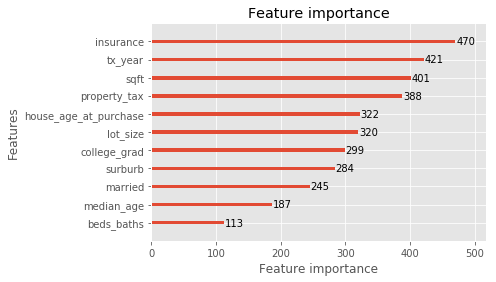

In [70]:
ax = lgb.plot_importance(gbm, max_num_features=15)

plt.show()

## Demonstration of 10-Fold cross validation

In [71]:
col = list(X_train.columns)
col

['sqft',
 'lot_size',
 'median_age',
 'married',
 'college_grad',
 'property_tax',
 'insurance',
 'tx_year',
 'beds_baths',
 'house_age_at_purchase',
 'surburb']

In [72]:
# Getting all the data points only from columns specified above
X_modified = X[col]

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=0)
for idx, val in enumerate(pipelines):
    start_time = time.time()
    results = cross_val_score(val, X_modified, np.ravel(y), scoring='neg_mean_absolute_error',cv=kfold)
    elapsed_time = time.time() - start_time
    print('%s pipeline: %.3f | Time taken: %f' % (pipe_dict[idx], abs(results.mean()), elapsed_time))

Linear Regression pipeline: 92218.076 | Time taken: 0.020941
Decision Tree pipeline: 69224.808 | Time taken: 0.167551
Random Forest pipeline: 52555.943 | Time taken: 0.796871
XGBoost pipeline: 46966.178 | Time taken: 0.862691
CatBoost pipeline: 49003.277 | Time taken: 66.164037


### Results (10-fold cross validation):

<br>
1. XGBoost pipeline: 46966.178 | Time taken: 0.862691

2. CatBoost pipeline: 49003.277 | Time taken: 66.164037

3. Random Forest pipeline: 52555.943 | Time taken: 0.796871

4. Decision Tree pipeline: 69224.808 | Time taken: 0.167551

5. Linear Regression pipeline: 92218.076 | Time taken: 0.020941

<br>
Without tuning, it seems like in terms of accuracy and efficiency. XGBoost is the best model to use for the property valuation with the lowest MAE for 10-fold cross validation (~47k). For the second best model CatBoost (MAE: ~49k), it requires much more time to perform a 10-fold cross validation (~77 folds of time for XGBoost). And of course, more tuning can be done to improve the predictability of the models.

### Next stage: Model paratmeters tuning